In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("C:/Users/Hp/Downloads/archive (2)/players_20.csv")
data.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, CF, ST",94,94,95500000.0,560000.0,32,...,53+6,53+6,53+6,63+6,19+6,https://cdn.sofifa.net/players/158/023/20_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",93,93,58500000.0,410000.0,34,...,54+3,54+3,54+3,61+3,20+3,https://cdn.sofifa.net/players/020/801/20_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",92,92,105500000.0,290000.0,27,...,47+6,47+6,47+6,61+6,20+6,https://cdn.sofifa.net/players/190/871/20_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1370/60.png,https://cdn.sofifa.net/flags/br.png
3,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,"LW, CF",91,91,90000000.0,470000.0,28,...,49+6,49+6,49+6,61+6,18+6,https://cdn.sofifa.net/players/183/277/20_120.png,https://cdn.sofifa.net/teams/243/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CAM, CM",91,91,90000000.0,370000.0,28,...,67+3,67+3,67+3,73+3,21+3,https://cdn.sofifa.net/players/192/985/20_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [3]:
corr = data.corr()
corr

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
sofifa_id,1.000000,-0.445784,0.039701,-0.161719,-0.227988,-0.735976,-0.092313,-0.202248,0.096809,-0.021737,...,-0.386141,-0.133088,-0.088615,-0.069757,-0.111345,-0.115011,-0.113113,-0.121864,-0.111751,-0.347869
overall,-0.445784,1.000000,0.646955,0.644600,0.586448,0.465033,0.040289,0.157001,-0.187135,-0.241671,...,0.720784,0.304433,0.250997,0.220770,-0.014063,-0.014310,-0.018079,-0.006909,-0.013429,0.484760
potential,0.039701,0.646955,1.000000,0.583904,0.487891,-0.261962,-0.002456,-0.010938,-0.280321,-0.197013,...,0.445478,0.168788,0.146592,0.130630,-0.051026,-0.051819,-0.057295,-0.049937,-0.051950,0.243023
value_eur,-0.161719,0.644600,0.583904,1.000000,0.854305,0.087864,0.009960,0.053271,-0.186182,-0.159395,...,0.462468,0.157022,0.126921,0.104646,-0.020829,-0.020904,-0.021855,-0.019205,-0.020511,0.266419
wage_eur,-0.227988,0.586448,0.487891,0.854305,1.000000,0.153274,0.019222,0.066302,-0.208468,-0.147287,...,0.431701,0.157392,0.133378,0.115119,-0.023498,-0.023841,-0.024580,-0.022439,-0.024525,0.277125
age,-0.735976,0.465033,-0.261962,0.087864,0.153274,1.000000,0.081663,0.237192,0.081468,-0.074845,...,0.370415,0.157320,0.116946,0.101640,0.110468,0.113095,0.112690,0.121648,0.111789,0.339860
height_cm,-0.092313,0.040289,-0.002456,0.009960,0.019222,0.081663,1.000000,0.769319,-0.111412,0.056582,...,-0.159193,-0.077647,-0.068869,-0.077015,0.367869,0.367816,0.365629,0.367577,0.367803,-0.020872
weight_kg,-0.202248,0.157001,-0.010938,0.053271,0.066302,0.237192,0.769319,1.000000,-0.061596,0.003336,...,-0.053853,-0.049985,-0.053079,-0.064553,0.342886,0.343932,0.340471,0.344972,0.343656,0.079013
club_team_id,0.096809,-0.187135,-0.280321,-0.186182,-0.208468,0.081468,-0.111412,-0.061596,1.000000,-0.153858,...,-0.162309,-0.053368,-0.049918,-0.042967,-0.003035,-0.004502,-0.002810,-0.004427,-0.003464,-0.099194
league_level,-0.021737,-0.241671,-0.197013,-0.159395,-0.147287,-0.074845,0.056582,0.003336,-0.153858,1.000000,...,-0.149202,-0.059891,-0.049449,-0.048103,-0.016952,-0.018515,-0.018941,-0.020575,-0.017862,-0.004397


In [4]:
corr_with_target = corr['overall'].sort_values(ascending=False)
new_data = corr_with_target[abs(corr_with_target) > 0.5]
new_data

overall                    1.000000
movement_reactions         0.864161
mentality_composure        0.720784
passing                    0.684483
potential                  0.646955
value_eur                  0.644600
release_clause_eur         0.630302
dribbling                  0.601036
wage_eur                   0.586448
power_shot_power           0.567713
physic                     0.517629
mentality_vision           0.509897
attacking_short_passing    0.504083
Name: overall, dtype: float64

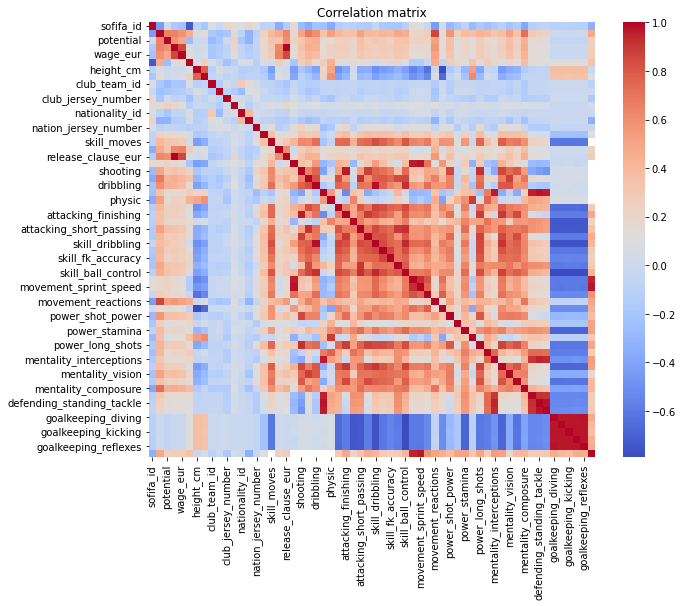

In [5]:
# plot correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

In [6]:
# create a list of feature names to keep
features_to_keep = list(new_data.index)

# drop the other features from the dataset
df_new = data[features_to_keep].copy()


In [7]:
df_new.head()

,overall,movement_reactions,mentality_composure,passing,potential,value_eur,release_clause_eur,dribbling,wage_eur,power_shot_power,physic,mentality_vision,attacking_short_passing
0,94,95,96,92.0,94,95500000.0,195800000.0,96.0,560000.0,86,66.0,94,92
1,93,96,95,82.0,93,58500000.0,96500000.0,89.0,410000.0,95,78.0,82,83
2,92,92,94,87.0,92,105500000.0,195200000.0,95.0,290000.0,80,58.0,90,87
3,91,90,91,86.0,91,90000000.0,184500000.0,94.0,470000.0,82,66.0,89,89
4,91,91,91,92.0,91,90000000.0,166500000.0,86.0,370000.0,91,78.0,94,92


In [8]:
(df_new.isnull().mean() * 100).apply(lambda x: f'{x:.3f}%')


overall                     0.000%
movement_reactions          0.000%
mentality_composure         0.000%
passing                    11.151%
potential                   0.000%
value_eur                   1.353%
release_clause_eur          7.023%
dribbling                  11.151%
wage_eur                    1.298%
power_shot_power            0.000%
physic                     11.151%
mentality_vision            0.000%
attacking_short_passing     0.000%
dtype: object

In [9]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18483 entries, 0 to 18482
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   overall                  18483 non-null  int64  
 1   movement_reactions       18483 non-null  int64  
 2   mentality_composure      18483 non-null  int64  
 3   passing                  16422 non-null  float64
 4   potential                18483 non-null  int64  
 5   value_eur                18233 non-null  float64
 6   release_clause_eur       17185 non-null  float64
 7   dribbling                16422 non-null  float64
 8   wage_eur                 18243 non-null  float64
 9   power_shot_power         18483 non-null  int64  
 10  physic                   16422 non-null  float64
 11  mentality_vision         18483 non-null  int64  
 12  attacking_short_passing  18483 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 1.8 MB


In [10]:
df_new.dropna(how='all')

,overall,movement_reactions,mentality_composure,passing,potential,value_eur,release_clause_eur,dribbling,wage_eur,power_shot_power,physic,mentality_vision,attacking_short_passing
0,94,95,96,92.0,94,95500000.0,195800000.0,96.0,560000.0,86,66.0,94,92
1,93,96,95,82.0,93,58500000.0,96500000.0,89.0,410000.0,95,78.0,82,83
2,92,92,94,87.0,92,105500000.0,195200000.0,95.0,290000.0,80,58.0,90,87
3,91,90,91,86.0,91,90000000.0,184500000.0,94.0,470000.0,82,66.0,89,89
4,91,91,91,92.0,91,90000000.0,166500000.0,86.0,370000.0,91,78.0,94,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18478,48,51,42,47.0,60,50000.0,98000.0,44.0,1000.0,54,53.0,44,54
18479,48,43,42,47.0,67,60000.0,143000.0,44.0,800.0,44,51.0,47,53
18480,48,38,40,40.0,73,60000.0,165000.0,55.0,500.0,52,46.0,45,37
18481,48,47,34,33.0,72,60000.0,165000.0,48.0,500.0,21,52.0,31,35


In [11]:
# Separate the features and target variable
X = df_new.drop('overall', axis=1)
y = df_new['overall']

# Initialize the iterative imputer
imp = IterativeImputer()

# Fit and transform the data
X_imputed = imp.fit_transform(X)

# Convert the imputed data back into a DataFrame
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Concatenate the imputed data and target variable into a new DataFrame
df_imputed = pd.concat([X_imputed_df, y], axis=1)


In [12]:
df_imputed.head()

,movement_reactions,mentality_composure,passing,potential,value_eur,release_clause_eur,dribbling,wage_eur,power_shot_power,physic,mentality_vision,attacking_short_passing,overall
0,95.0,96.0,92.0,94.0,95500000.0,195800000.0,96.0,560000.0,86.0,66.0,94.0,92.0,94
1,96.0,95.0,82.0,93.0,58500000.0,96500000.0,89.0,410000.0,95.0,78.0,82.0,83.0,93
2,92.0,94.0,87.0,92.0,105500000.0,195200000.0,95.0,290000.0,80.0,58.0,90.0,87.0,92
3,90.0,91.0,86.0,91.0,90000000.0,184500000.0,94.0,470000.0,82.0,66.0,89.0,89.0,91
4,91.0,91.0,92.0,91.0,90000000.0,166500000.0,86.0,370000.0,91.0,78.0,94.0,92.0,91


In [14]:
(df_new.isnull().mean() * 100).apply(lambda x: f'{x:.3f}%')

movement_reactions         0.000%
mentality_composure        0.000%
passing                    0.000%
potential                  0.000%
value_eur                  0.000%
release_clause_eur         0.000%
dribbling                  0.000%
wage_eur                   0.000%
power_shot_power           0.000%
physic                     0.000%
mentality_vision           0.000%
attacking_short_passing    0.000%
overall                    0.000%
dtype: object

In [15]:

    def preprocessor(data):
        data = pd.read_csv(data)

        data = data[['overall', 'movement_reactions', 'mentality_composure', 'passing', 'potential', 'value_eur', 'release_clause_eur', 'dribbling', 'wage_eur', 'power_shot_power', 'physic', 'mentality_vision', 'attacking_short_passing']
]
        # Separate the features and target variable
        X = data.drop('overall', axis=1)   
        y = data['overall']

        # Initialize the iterative imputer
        imp = IterativeImputer()

        # Fit and transform the data
        X_imputed = imp.fit_transform(X)

        # Convert the imputed data back into a DataFrame
        X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

        return X_imputed_df, y

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed_df, y, test_size=0.2, random_state=42)

In [17]:
import xgboost as xgb
model = xgb.XGBRegressor(objective='reg:squarederror',alpha=0.1, n_estimators=300, max_depth=7, learning_rate=0.1, random_state=42)

In [18]:
target_range = df_new['overall'].describe()[['min', 'max']]
print(target_range)

min    48.0
max    94.0
Name: overall, dtype: float64


In [19]:
model.fit(X_train, y_train)

XGBRegressor(alpha=0.1, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [20]:
y_pred = model.predict(X_test)

In [21]:
mse = mean_squared_error(y_test, y_pred)
mse

0.8790581187544937

In [22]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

# create the model
model = XGBRegressor()

# define the grid search object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# fit the grid search object to the data
grid_search.fit(X_train, y_train)

# print the best parameters and score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Best Parameters:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Best Score:  -0.9810914904319503


In [23]:
new_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=300, max_depth=7, learning_rate=0.1, random_state=42)

In [24]:
import pickle

In [25]:
# save the model to a file
filename = 'sport_pred.sav'
pickle.dump(new_model, open(filename, 'wb'))

In [26]:
# load the saved model from a file
loaded_model = pickle.load(open(filename, 'rb'))

# use the loaded model to make predictions on new data
new_data = "C:/Users/Hp/Downloads/archive (2)/players_21.csv"
X_imputed_df, y = preprocessor(new_data)

X_imputed_df['overall'] = y
X_imputed_df.drop('overall', axis=1, inplace=True)

loaded_model.fit(X_imputed_df, y)

predictions = loaded_model.predict(X_imputed_df)
mse = mean_squared_error(y, predictions)

c:\Users\Hp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\impute\_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [27]:
mse

0.31039290627102356